['benign-2c .csv', 'malware.csv']
   Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  TotLen_Fwd_Pkts  \
0           5870             2             0              813   
1           1499             2             0              128   
2             16             0             2                0   
3          46435             1             1               79   
4              0             1             0              356   

   TotLen_Bwd_Pkts  Fwd_Pkt_Len_Min  Bwd_Pkt_Len_Min  Fwd_Pkt_Len_Max  \
0                0               83             -1.0              730   
1                0               64             -1.0               64   
2              159               -1             52.0               -1   
3               95               79             95.0               79   
4                0              356             -1.0              356   

   Bwd_Pkt_Len_Max  Fwd_Pkt_Len_Mean  Bwd_Pkt_Len_Mean  Fwd_Pkt_Len_Std  \
0               -1             406.5               0.0       

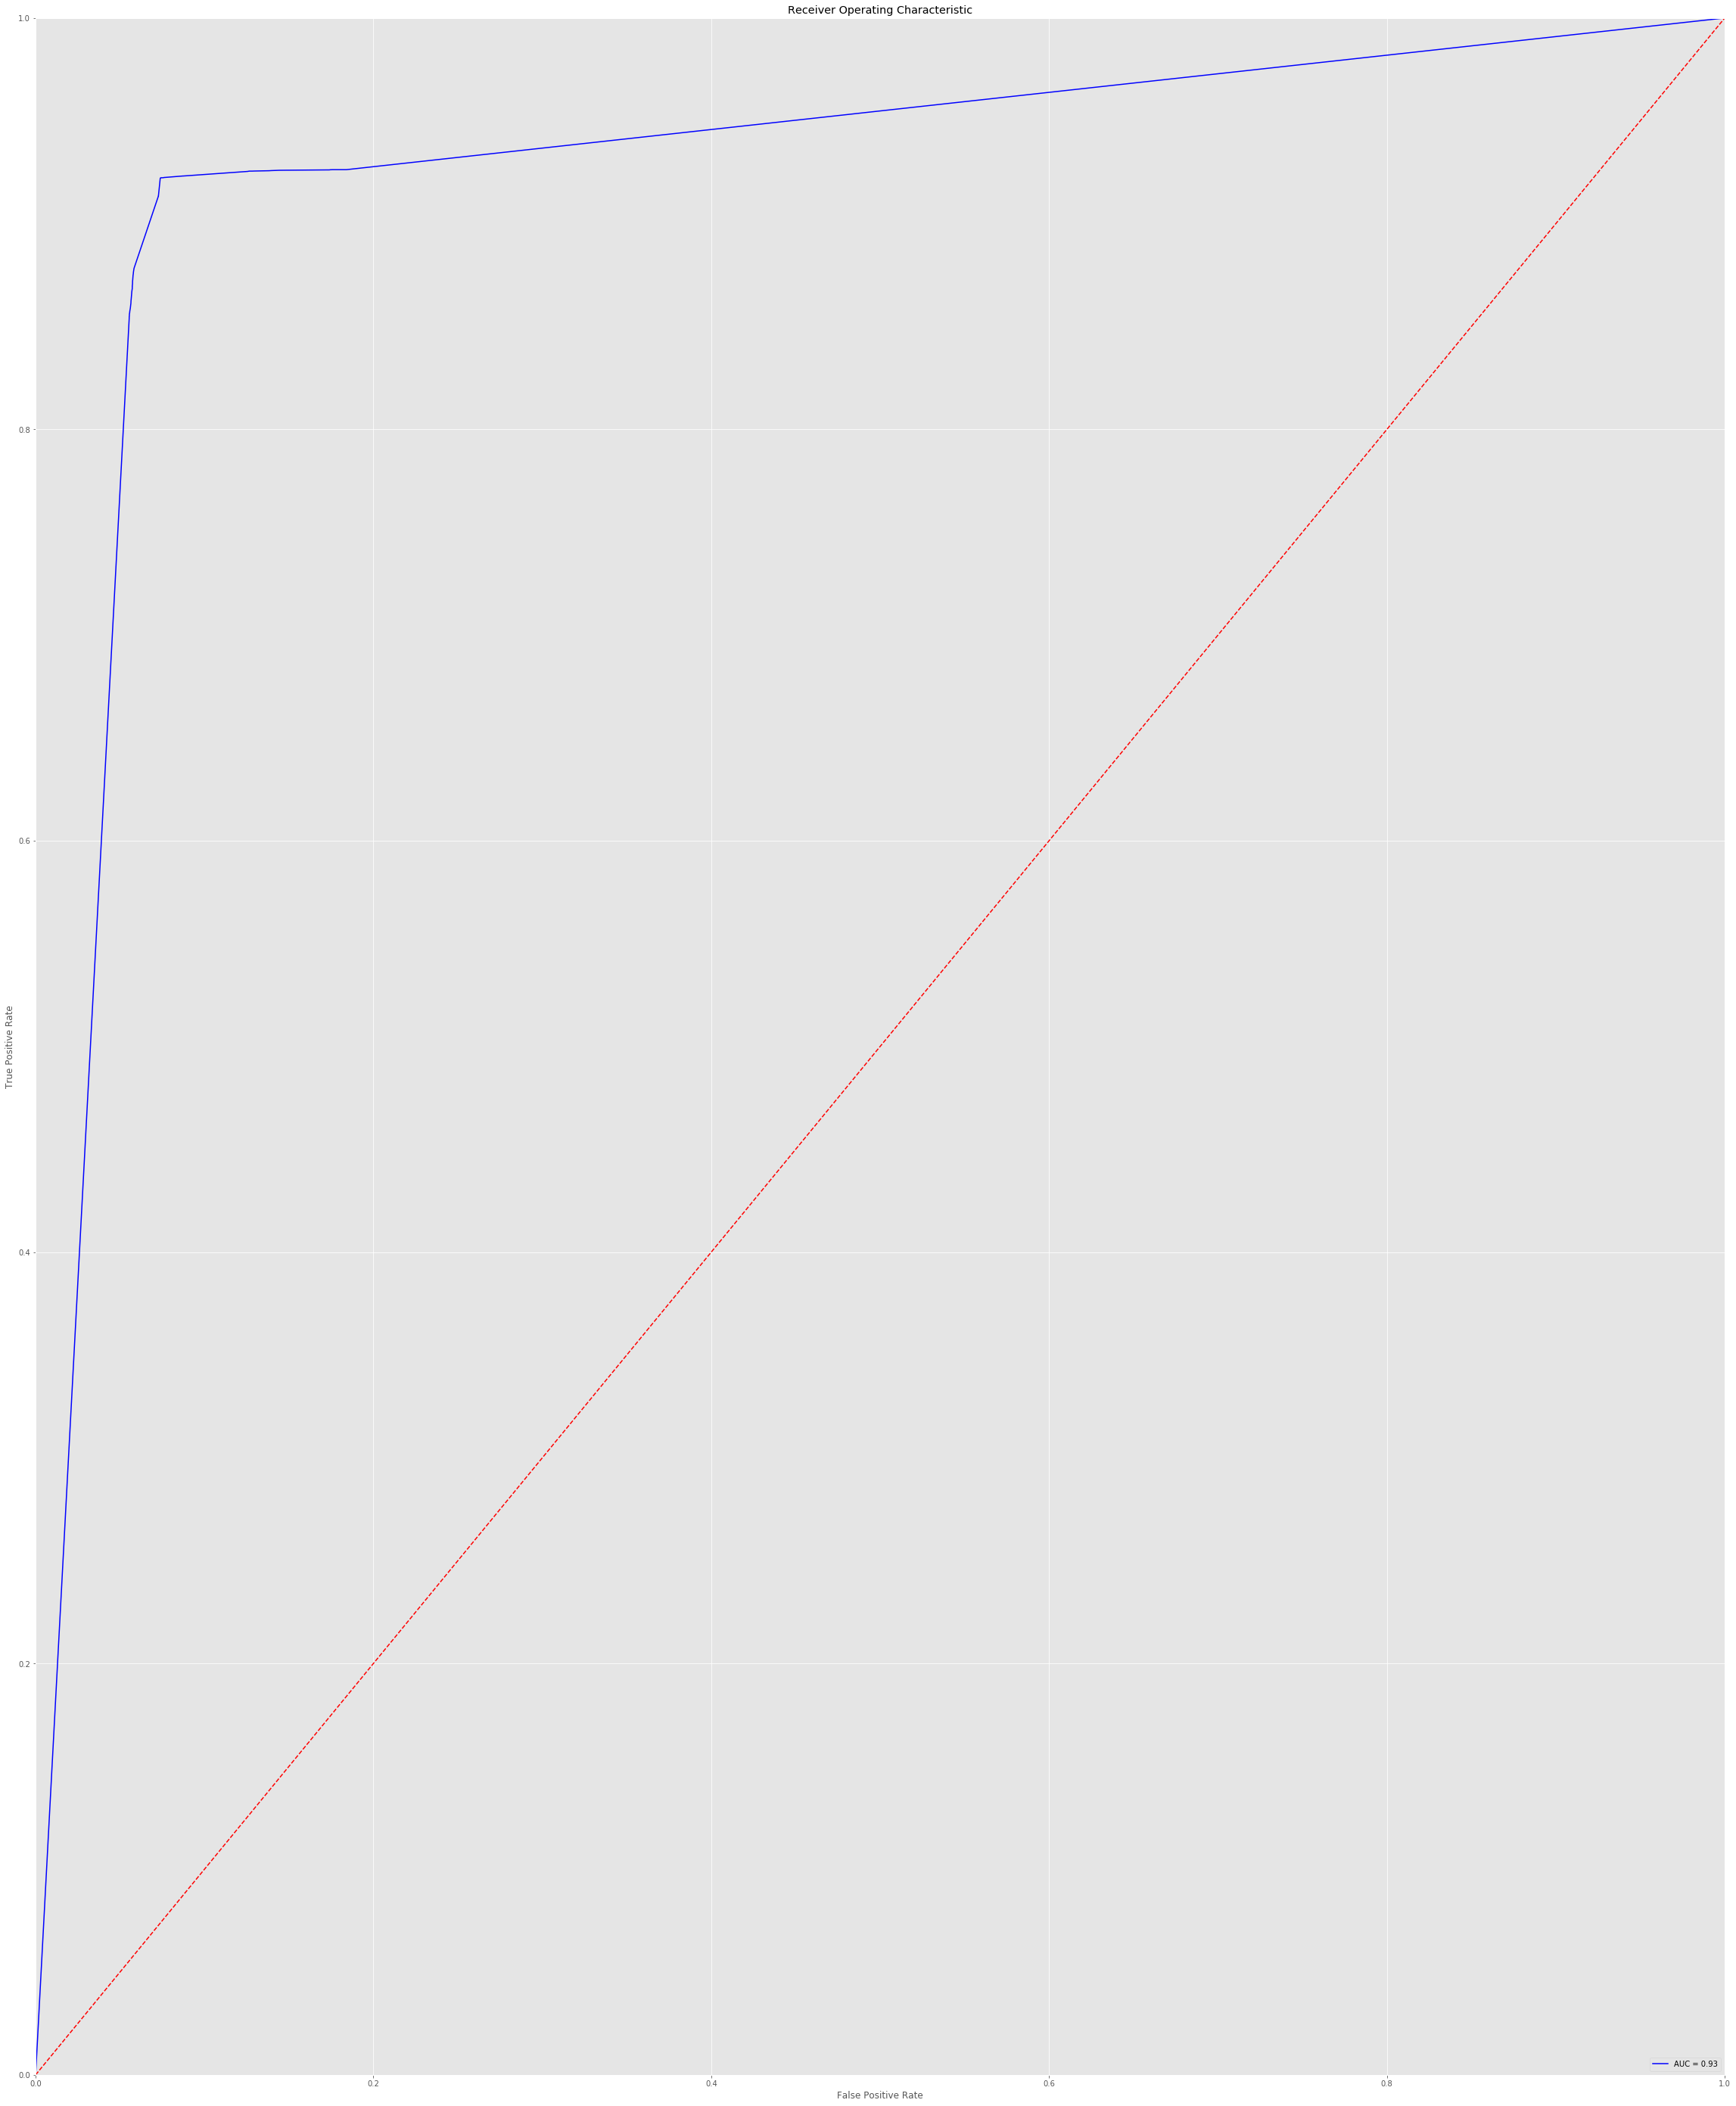

Metrica del modelo 99.80519331698486
Metricas cross_validation [94.06426181 94.07342898 94.15134986 94.09634689 94.02300958 94.10066007
 94.05023836 94.03648698 94.29317932 93.87147048]
Metrica en Test 94.0486230794617
[[26117  1409]
 [ 1837 25179]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     27526
           1       0.95      0.93      0.94     27016

    accuracy                           0.94     54542
   macro avg       0.94      0.94      0.94     54542
weighted avg       0.94      0.94      0.94     54542



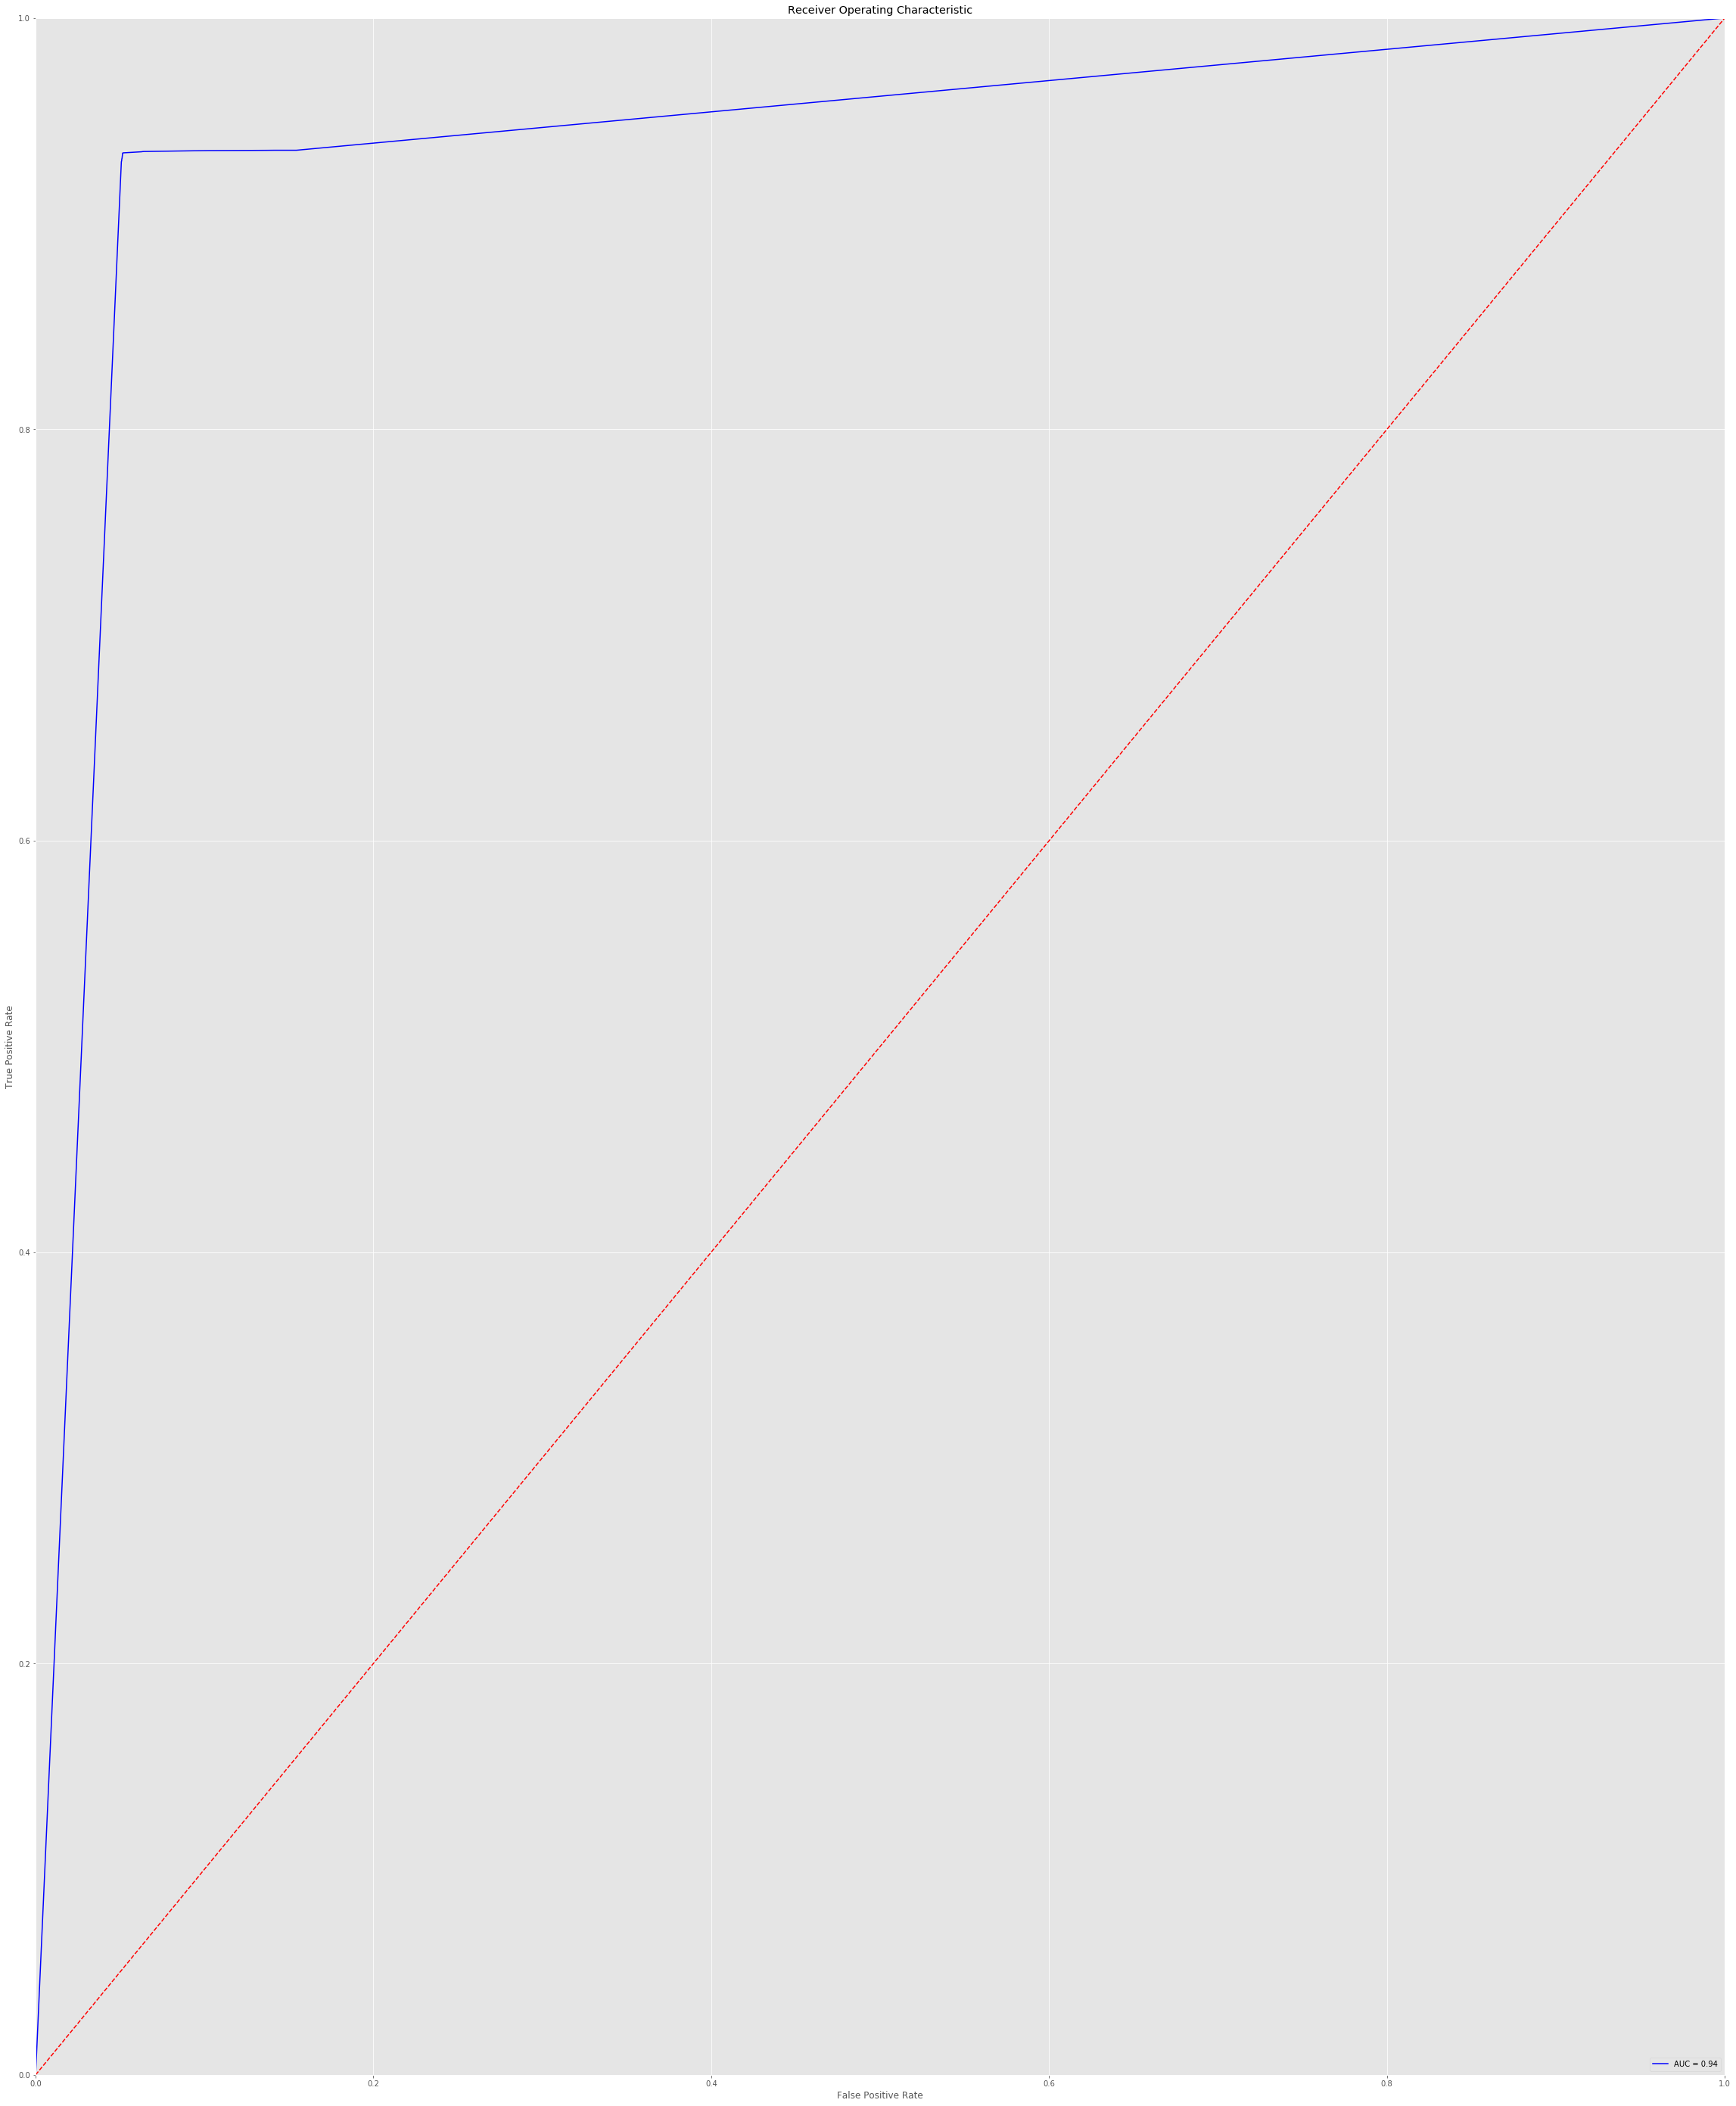

In [2]:
""" ARBOL CON CLASE BINARIA BENIGNOS Y RANSOMWARE"""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix 
from sklearn import datasets, metrics
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import os
import glob

"""crea entorno grÃ¡fico"""
plt.rcParams['figure.figsize'] = (40, 50)
plt.style.use('ggplot')

# Primero especificamos un patrón del archivo y lo pasamos como parámetro en la función glob
os.chdir("..\\Datasets")
os.getcwd()
csv_files = glob.glob('*.csv')
# Mostrar el archivo csv_files, el cual es una lista de nombres
print(csv_files)

list_data = []
  
# Escribimos un loop que irá a través de cada uno de los nombres de archivo a través de globbing y el resultado final será la lista dataframes

for filename in csv_files:
    data = pd.read_csv(filename)
    list_data.append(data)

#Para chequear que todo está bien, mostramos la list_data por consola
#list_data
 
df = pd.concat(list_data,ignore_index=True)

tipos=df.dtypes  #tipos de datos de campos

"""información datos"""
print(df.head(5))
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

"""Columnas, nulos y tipo de datos"""
print(df.info())

"""descripción estadística de los datos numéricos"""
print(df.describe())

"""correlación entre los datos"""
corr = df.set_index('Label').corr()
#sm.graphics.plot_corr(corr, xnames=list(corr.columns))
#plt.show()

df2=df[['Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts',
       'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Min',
       'Fwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Std', 'Flow_Pkts/s',
       'Flow_Byts/s']]
df3=df[['Label']]

"""convertir columna tipo dato str a int"""
df2['Label']=df3[['Label']]

"""desordena el dataset"""

df2=df2.sort_values('Fwd_Pkt_Len_Min')
df2 = df2[df2['Label'].isin([1,2,3,4])]

""" convertir valores número la clase"""
df2['Label'] = df2['Label'].replace(1,"Benigno")
df2['Label'] = df2['Label'].replace(2,"Malware")
df2['Label'] = df2['Label'].replace(3,"Malware")
df2['Label'] = df2['Label'].replace(4,"Malware")
#print(df2.head(10))
#print(df2.groupby('Label').size())


dff=df2[:]
dff1 = dff[dff.Label == 'Malware']
dff = dff.drop(dff[dff['Label'] == 'Malware'].index)
a = dff1.iloc[0:134800,]
df2 = pd.concat([dff,a])



print(df2.groupby('Label').size())




"""CREAMOS EL MODELO Y LO PROBAMOS CON LOS MISMOS DATOS SIN CROSs"""

#con np.array para otra cosa
#X = np.array(df2.drop(['Label'],1))
#y = np.array(df2['Label'])

#X = df2.drop(['Label'], axis=1)
#y = df2['Label']

from sklearn.tree import DecisionTreeClassifier

# Split dataset in training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(df2[['Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts',
       'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Min',
       'Fwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Max', 
	   ]],df2['Label'], test_size=0.2, random_state=6) 
"""
clf2 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=0, splitter='best')#presort=False,
"""
clf2 = DecisionTreeClassifier()
#entreno modelo

clf2.fit(X_train, Y_train)

acc_decision_tree = round(clf2.score(X_train, Y_train) * 100, 2)
print("Precisión Modelo entrenado (Accuracy) : ", acc_decision_tree, "%")
acc_decision_tree = round(clf2.score(X_test, Y_test) * 100, 2)
print("Precisión Modelo validado (Accuracy) : ", acc_decision_tree, "%")

#Realizo una predicción
y_pred2 = clf2.predict(X_test)

matriz = confusion_matrix(Y_test, y_pred2)
print('Matriz de Confusión AD Validada :')
print(matriz)

print("Métricas AD Validadas")
print(classification_report(Y_test, y_pred2))




""" convierto valor nombre a 0=benigno 1=malware para AUC-ROC"""

label_encoder = LabelEncoder()
df2.iloc[:,15] = label_encoder.fit_transform(df2.iloc[:,15]).astype('int64')
X_train, X_test, Y_train, Y_test = train_test_split(df2[['Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts',
       'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Min',
       'Fwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Max', 
	   ]],df2['Label'], test_size=0.2, random_state=6) 


def plot_roc(model, X_test, Y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_roc(clf2, X_test, Y_test)


"""============================================="""
""" CROSS VALIDATION"""

X_trainCV, X_testCV, Y_trainCV, Y_testCV = train_test_split(df2[['Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts',
       'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Min',
       'Fwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Std', 'Flow_Pkts/s',
       'Flow_Byts/s']],df2['Label'], test_size=0.2, random_state=6) 


clfCV = DecisionTreeClassifier()
clfCV.fit(X_trainCV, Y_trainCV)
kf = KFold(n_splits=10)
score = clfCV.score(X_trainCV,Y_trainCV)
print("Metrica del modelo", score * 100)
scores = cross_val_score(clfCV, X_trainCV, Y_trainCV, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scores * 100)
#print("Media de cross_validation", scores.mean() * 100)
preds = clfCV.predict(X_testCV)
score_pred = metrics.accuracy_score(Y_testCV, preds)
print("Metrica en Test", score_pred * 100)
conf_mat = confusion_matrix(Y_testCV, preds)
print(conf_mat)
print(classification_report(Y_testCV, preds))

def plot_roc(model, X_test, Y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_roc(clfCV, X_testCV, Y_testCV)